In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
file = r'../data/a10.csv'
df_drug = pd.read_csv(file, parse_dates=['date'], index_col='date')
df_drug.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


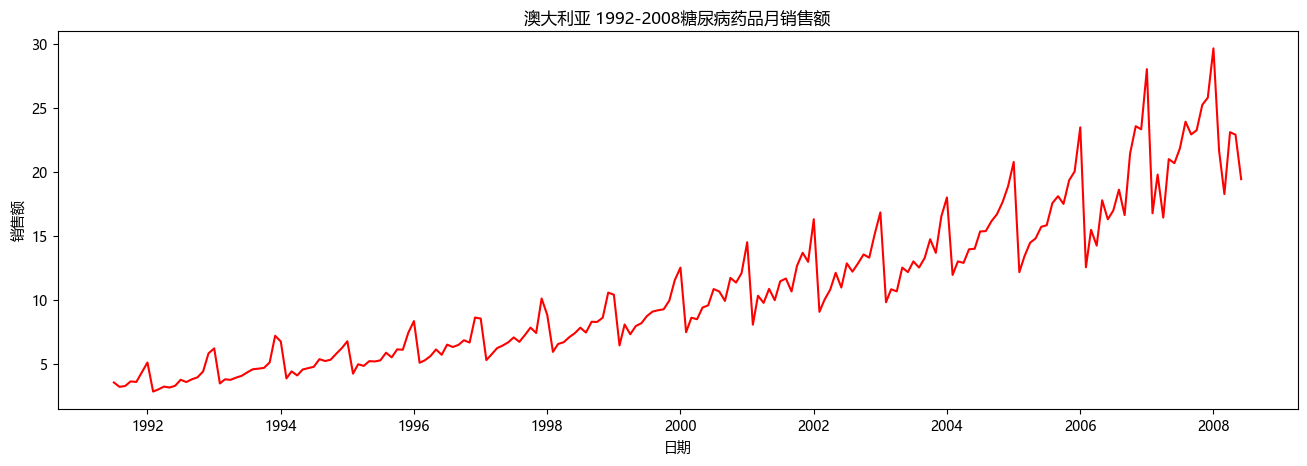

In [3]:
def plot_df(df, x, y, title='', xlabel='日期', ylabel='股价', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df_drug, x=df_drug.index, y=df_drug.value, title='澳大利亚 1992-2008糖尿病药品月销售额', ylabel='销售额')

In [4]:
df_drug.reset_index(inplace=True)
df_drug.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
df_drug['year'] = df_drug['date'].dt.year
df_drug['month'] = df_drug['date'].dt.month
df_drug.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,7
1,1991-08-01,3.180891,1991,8
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-11-01,3.565869,1991,11


In [6]:
years = df_drug['year'].unique()
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [7]:
np.random.seed(100)  # 为了画图的图像颜色一致
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

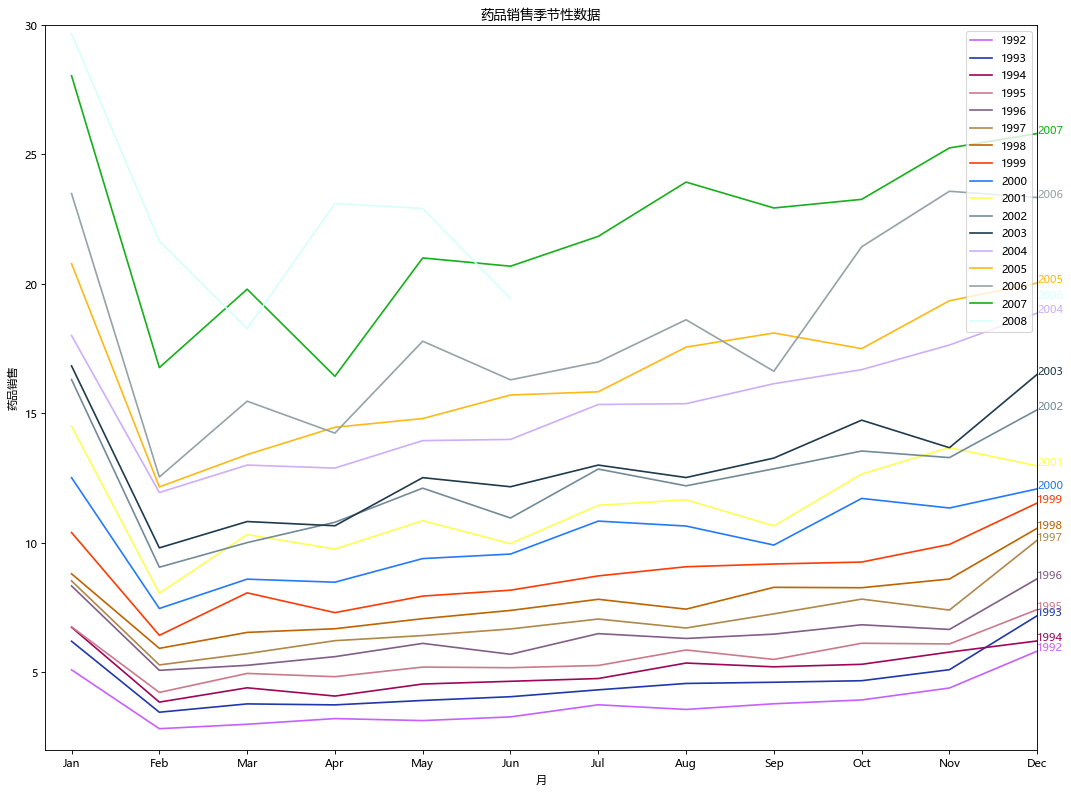

In [8]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i>0:  # 这样去掉了第一年,因为第一年数据不完整
        plt.plot('month', 'value', data=df_drug[df_drug['year']==years[i]], color=mycolors[i], label=years[i])
        plt.text(12, df_drug[df_drug['year']==years[i]]['value'].iloc[-1], years[i], color=mycolors[i])
plt.gca().set(xlim=(.7, 11), ylim=(2, 30), ylabel='药品销售', xlabel='月')
plt.title('药品销售季节性数据')
plt.gca().set_xticks(range(1, 13))
plt.gca().set_xticklabels(labels)
plt.legend(loc='best')
plt.show()

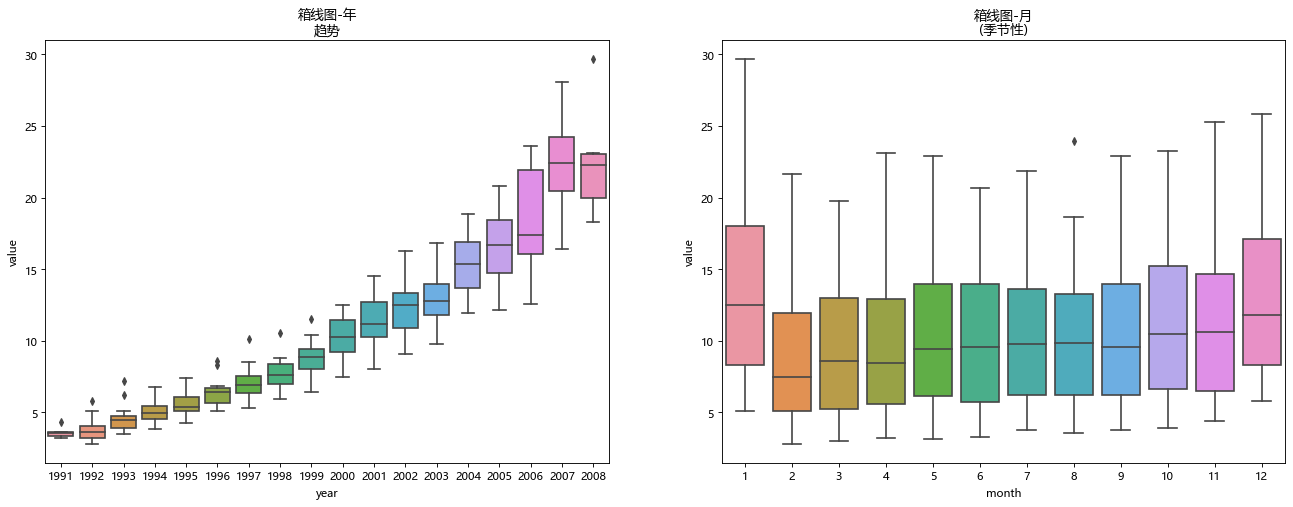

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df_drug, ax=axes[0])
sns.boxplot(x='month', y='value', data=df_drug[df_drug['year']!=1991])
axes[0].set_title('箱线图-年\n趋势')
axes[1].set_title('箱线图-月\n(季节性)')
plt.show()

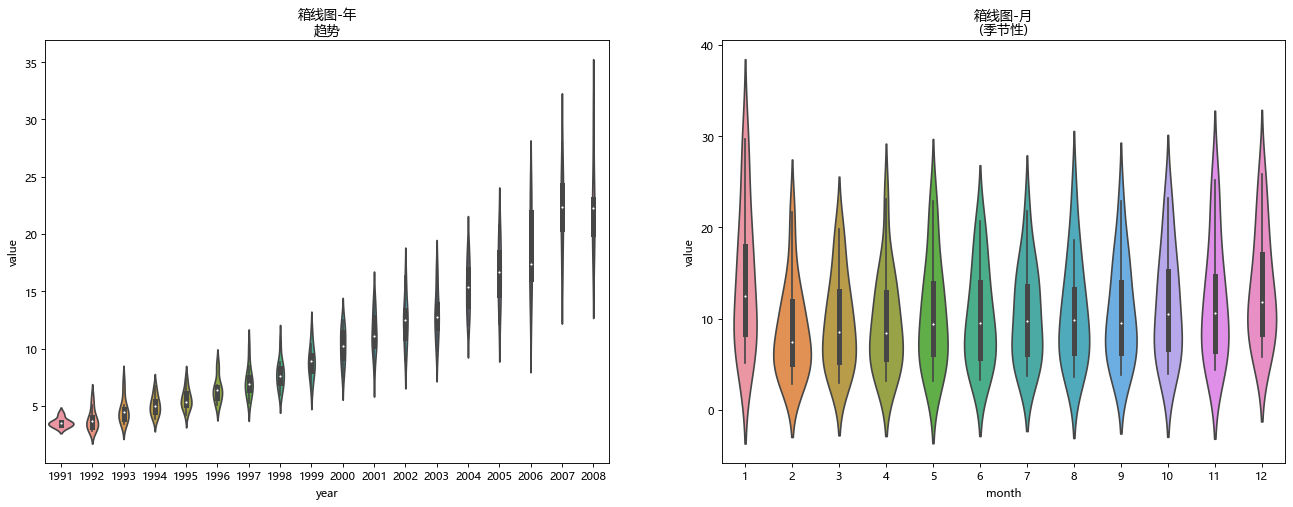

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.violinplot(x='year', y='value', data=df_drug, ax=axes[0])
sns.violinplot(x='month', y='value', data=df_drug[df_drug['year']!=1991])
axes[0].set_title('箱线图-年\n趋势')
axes[1].set_title('箱线图-月\n(季节性)')
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv(file, parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [12]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
# result_mul.resid, result_mul.seasonal, result_mul.trend, result_mul.observed
result_add = seasonal_decompose(df['value'], extrapolate_trend='freq')  # 默认为加法模型

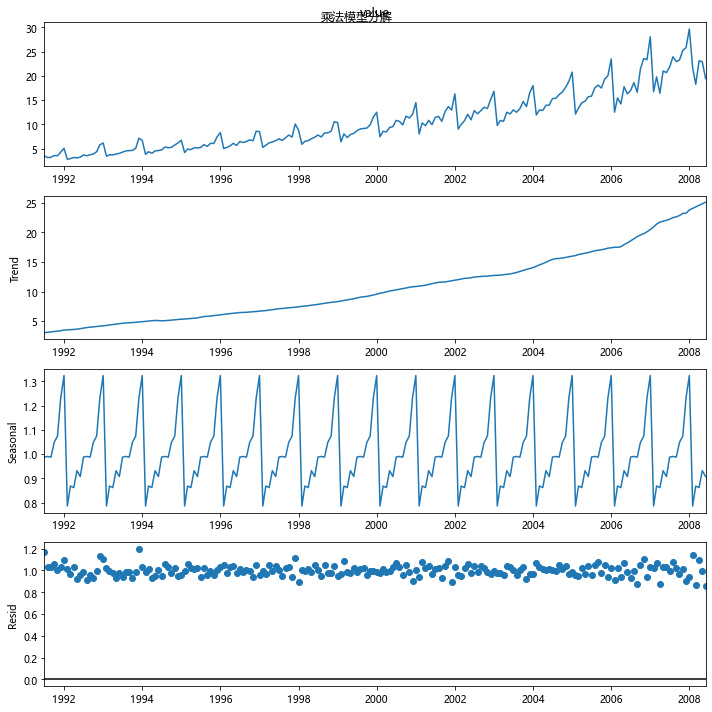

In [20]:
plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot()
plt.suptitle('乘法模型分解')
plt.show()

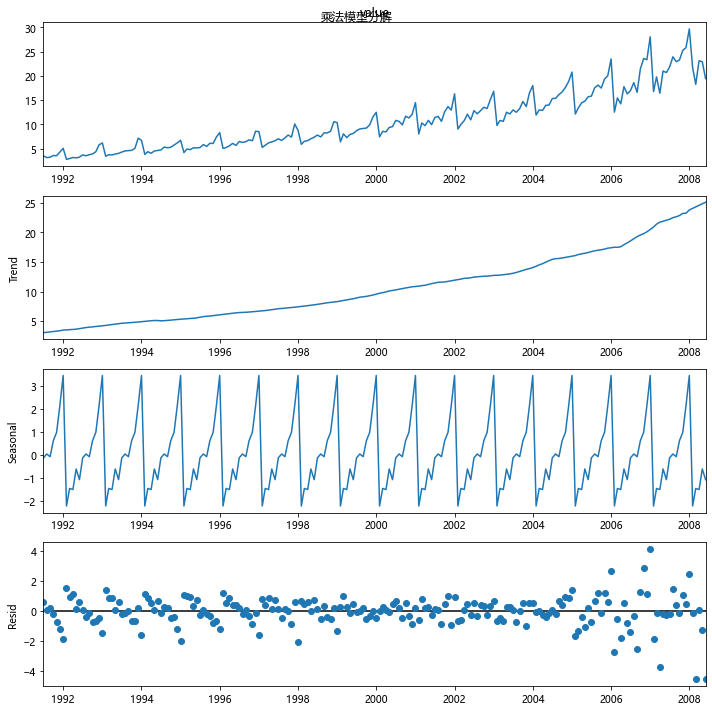

In [21]:
# plt.figure(figsize=(10, 10))
result_add.plot()
plt.suptitle('乘法模型分解')
plt.show()

In [22]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869
...,...,...,...,...
2008-02-01,0.785976,24.037399,1.146165,21.654285
2008-03-01,0.868249,24.298458,0.865756,18.264945
2008-04-01,0.861883,24.559516,1.091662,23.107677


In [23]:
df_reconstructed['seas'] * df_reconstructed['trend'] * df_reconstructed['resid']

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Length: 204, dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

df = pd.read_csv(file, parse_dates=['date'])

In [25]:
result = adfuller(df['value'])
result

(3.145185689306741,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [26]:
result = kpss(df['value'])
result

D:\software\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
D:\software\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.3136750533447588,
 0.01,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [27]:
df['value_df1'] = df['value'].diff(1)
result = adfuller(df['value_df1'].iloc[1:])
result

(-2.4951721474497197,
 0.1166534168646926,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 547.1880809726355)

In [28]:
df['value_df2'] = df['value_df1'].diff(1)
result = adfuller(df['value_df2'].iloc[2:])
result

(-10.292304706517472,
 3.543916358526254e-18,
 14,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 548.8960194373399)

In [29]:
df

,date,value,value_df1,value_df2
0,1991-07-01,3.526591,NaN,NaN
1,1991-08-01,3.180891,-0.345700,NaN
2,1991-09-01,3.252221,0.071330,0.417030
3,1991-10-01,3.611003,0.358782,0.287452
4,1991-11-01,3.565869,-0.045134,-0.403916
...,...,...,...,...
199,2008-02-01,21.654285,-8.011071,-11.870337
200,2008-03-01,18.264945,-3.389340,4.621731
201,2008-04-01,23.107677,4.842732,8.232072
202,2008-05-01,22.912510,-0.195167,-5.037899


In [32]:
df.shift()

,date,value,value_df1,value_df2
0,NaT,NaN,NaN,NaN
1,1991-07-01,3.526591,NaN,NaN
2,1991-08-01,3.180891,-0.345700,NaN
3,1991-09-01,3.252221,0.071330,0.417030
4,1991-10-01,3.611003,0.358782,0.287452
...,...,...,...,...
199,2008-01-01,29.665356,3.859266,3.303206
200,2008-02-01,21.654285,-8.011071,-11.870337
201,2008-03-01,18.264945,-3.389340,4.621731
202,2008-04-01,23.107677,4.842732,8.232072
